# Group Uranus - Phase 2 Project
![King County Skyline](./images/skyline.jpeg)
### Contributors: Jalen Charles, Brad Blackwood, and Ashley Eakland
### Project Proposal: 




### Building Condition [King County Assessor Website](https://info.kingcounty.gov/assessor/esales/Glossary.aspx?type=r)

Relative to age and grade. Coded 1-5.

1 = Poor- Worn out. Repair and overhaul needed on painted surfaces, roofing, plumbing, heating and numerous functional inadequacies. Excessive deferred maintenance and abuse, limited value-in-use, approaching abandonment or major reconstruction; reuse or change in occupancy is imminent. Effective age is near the end of the scale regardless of the actual chronological age.

2 = Fair- Badly worn. Much repair needed. Many items need refinishing or overhauling, deferred maintenance obvious, inadequate building utility and systems all shortening the life expectancy and increasing the effective age.

3 = Average- Some evidence of deferred maintenance and normal obsolescence with age in that a few minor repairs are needed, along with some refinishing. All major components still functional and contributing toward an extended life expectancy. Effective age and utility is standard for like properties of its class and usage.

4 = Good- No obvious maintenance required but neither is everything new. Appearance and utility are above the standard and the overall effective age will be lower than the typical property.

5= Very Good- All items well maintained, many having been overhauled and repaired as they have shown signs of wear, increasing the life expectancy and lowering the effective age with little deterioration or obsolescence evident with a high degree of utility.

### Building Grade [King County Assessor Website](https://info.kingcounty.gov/assessor/esales/Glossary.aspx?type=r)
Represents the construction quality of improvements. Grades run from grade 1 to 13. Generally defined as:

1-3 Falls short of minimum building standards. Normally cabin or inferior structure.

4 Generally older, low quality construction. Does not meet code.

5 Low construction costs and workmanship. Small, simple design.

6 Lowest grade currently meeting building code. Low quality materials and simple designs.

7 Average grade of construction and design. Commonly seen in plats and older sub-divisions.

8 Just above average in construction and design. Usually better materials in both the exterior and interior finish work.

9 Better architectural design with extra interior and exterior design and quality.

10 Homes of this quality generally have high quality features. Finish work is better and more design quality is seen in the floor plans. Generally have a larger square footage.

11 Custom design and higher quality finish work with added amenities of solid woods, bathroom fixtures and more luxurious options.

12 Custom design and excellent builders. All materials are of the highest quality and all conveniences are present.

13 Generally custom designed and built. Mansion level. Large amount of highest quality cabinet work, wood trim, marble, entry ways etc.

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.impute import MissingIndicator
from sklearn.feature_selection import RFE
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import statsmodels
from statsmodels.formula.api import ols
import seaborn as sns

In [2]:
df = pd.read_csv('data/kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [3]:
#plt.scatter(df.long, df.lat, s=1)

In [4]:
id_df= df[df['id'].duplicated()]
cols = ['id']
id_df[cols] = id_df[id_df[cols] != 0][cols]
id_df.dropna(subset=cols, inplace=True)
id_df.id.value_counts().max()

/Users/aeakland/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/pandas/core/frame.py:3065: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
<ipython-input-4-ca1ce55474ed>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  id_df.dropna(subset=cols, inplace=True)


2

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [6]:
df.corr()['price']['zipcode']

-0.053402434377726675

In [7]:
df['date'] = pd.to_datetime(df['date'])

In [8]:
df.loc[df['sqft_basement'] == '?'] = 0

In [9]:
df.sqft_basement = pd.to_numeric(df.sqft_basement)

In [10]:
df.drop(columns=['lat', 'long', 'sqft_living15', 'sqft_lot15'], inplace=True)
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode
0,7129300520,2014-10-13 00:00:00,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,Average,7 Average,1180,0.0,1955,0.0,98178
1,6414100192,2014-12-09 00:00:00,538000.0,3,2.25,2570,7242,2.0,NO,NONE,Average,7 Average,2170,400.0,1951,1991.0,98125
2,5631500400,2015-02-25 00:00:00,180000.0,2,1.00,770,10000,1.0,NO,NONE,Average,6 Low Average,770,0.0,1933,NaN,98028
3,2487200875,2014-12-09 00:00:00,604000.0,4,3.00,1960,5000,1.0,NO,NONE,Very Good,7 Average,1050,910.0,1965,0.0,98136
4,1954400510,2015-02-18 00:00:00,510000.0,3,2.00,1680,8080,1.0,NO,NONE,Average,8 Good,1680,0.0,1987,0.0,98074


In [11]:
zipcode_df = df.copy()
zipcode_df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode
0,7129300520,2014-10-13 00:00:00,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,Average,7 Average,1180,0.0,1955,0.0,98178
1,6414100192,2014-12-09 00:00:00,538000.0,3,2.25,2570,7242,2.0,NO,NONE,Average,7 Average,2170,400.0,1951,1991.0,98125
2,5631500400,2015-02-25 00:00:00,180000.0,2,1.00,770,10000,1.0,NO,NONE,Average,6 Low Average,770,0.0,1933,NaN,98028
3,2487200875,2014-12-09 00:00:00,604000.0,4,3.00,1960,5000,1.0,NO,NONE,Very Good,7 Average,1050,910.0,1965,0.0,98136
4,1954400510,2015-02-18 00:00:00,510000.0,3,2.00,1680,8080,1.0,NO,NONE,Average,8 Good,1680,0.0,1987,0.0,98074


In [12]:
zipcode_df['zipcode'] = zipcode_df['zipcode'].astype(object)
zipcode_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19258 non-null  object 
 9   view           21536 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  float64
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17843 non-null  float64
 16  zipcode        21597 non-null  object 
dtypes: float64(5), int64(6), object(6)
memory usage: 2

In [13]:
zipcode_df['view'].value_counts()

NONE         19018
AVERAGE        930
GOOD           496
0              454
FAIR           327
EXCELLENT      311
Name: view, dtype: int64

In [14]:
zipcode_df.loc[zipcode_df['view'].isna()]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode
7,2008000270,2015-01-15 00:00:00,291850.0,3,1.50,1060,9711,1.0,NO,NaN,Average,7 Average,1060,0.0,1963,0.0,98198
114,8961960160,2014-10-28 00:00:00,480000.0,4,2.50,3230,16171,2.0,NO,NaN,Average,9 Better,2520,710.0,2001,0.0,98001
129,7853210060,2015-04-06 00:00:00,430000.0,4,2.50,2070,4310,2.0,NO,NaN,Average,7 Average,2070,0.0,2004,0.0,98065
205,3456000310,2014-08-04 00:00:00,840000.0,4,1.75,2480,11010,1.0,NO,NaN,Good,9 Better,1630,850.0,1966,NaN,98040
487,1895000260,2014-07-21 00:00:00,207950.0,2,2.00,890,5000,1.0,NO,NaN,Average,6 Low Average,890,0.0,1917,0.0,98118
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19989,148000475,2014-05-28 00:00:00,1400000.0,4,3.25,4700,9160,1.0,NO,NaN,Average,11 Excellent,2520,2180.0,2005,0.0,98116
20148,291310170,2014-08-04 00:00:00,384500.0,3,2.50,1600,2610,2.0,NO,NaN,Average,8 Good,1600,0.0,2005,NaN,98027
20380,1196003740,2014-09-24 00:00:00,734000.0,5,4.25,4110,42755,2.0,NO,NaN,Average,10 Very Good,2970,1140.0,2000,NaN,98023
21057,3448900290,2014-08-28 00:00:00,636230.0,4,2.50,2840,6284,2.0,NO,NaN,Average,9 Better,2840,0.0,2013,0.0,98056


In [15]:
zipcode_df['view'].fillna(value='NONE', inplace=True)
zipcode_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19258 non-null  object 
 9   view           21597 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  float64
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17843 non-null  float64
 16  zipcode        21597 non-null  object 
dtypes: float64(5), int64(6), object(6)
memory usage: 2

In [16]:
zipcode_df['view'].replace(to_replace=0, value='NONE', inplace=True)

In [17]:
zipcode_df['view'].value_counts()

NONE         19533
AVERAGE        930
GOOD           496
FAIR           327
EXCELLENT      311
Name: view, dtype: int64

In [18]:
zipcode_df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode
0,7129300520,2014-10-13 00:00:00,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,Average,7 Average,1180,0.0,1955,0.0,98178
1,6414100192,2014-12-09 00:00:00,538000.0,3,2.25,2570,7242,2.0,NO,NONE,Average,7 Average,2170,400.0,1951,1991.0,98125
2,5631500400,2015-02-25 00:00:00,180000.0,2,1.00,770,10000,1.0,NO,NONE,Average,6 Low Average,770,0.0,1933,NaN,98028
3,2487200875,2014-12-09 00:00:00,604000.0,4,3.00,1960,5000,1.0,NO,NONE,Very Good,7 Average,1050,910.0,1965,0.0,98136
4,1954400510,2015-02-18 00:00:00,510000.0,3,2.00,1680,8080,1.0,NO,NONE,Average,8 Good,1680,0.0,1987,0.0,98074


In [19]:
zipcode_df['waterfront'].value_counts()

NO     18662
0        454
YES      142
Name: waterfront, dtype: int64

In [20]:
zipcode_df['waterfront'].replace(to_replace=0, value='NO', inplace=True)

In [21]:
zipcode_df['waterfront'].isna().sum()

2339

In [22]:
zipcode_df['waterfront'].fillna(value="NO", inplace=True)
zipcode_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     21597 non-null  object 
 9   view           21597 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  float64
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17843 non-null  float64
 16  zipcode        21597 non-null  object 
dtypes: float64(5), int64(6), object(6)
memory usage: 2

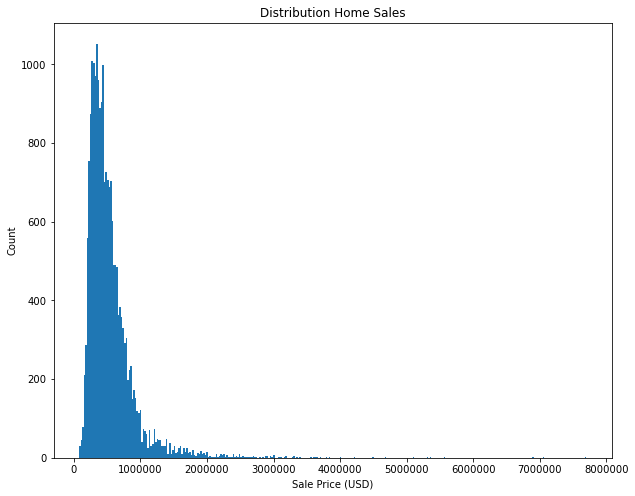

In [98]:
import matplotlib.pyplot as plt
%matplotlib inline
fig, ax = plt.subplots(figsize=(10,8))
ax.hist(zipcode_df.price, bins='auto')
ax.ticklabel_format(style='plain')
ax.set_xlabel("Sale Price (USD)")
ax.set_ylabel("Count")
ax.set_title("Distribution Home Sales");

In [100]:
zipcode_df.sqft_living.median()

1910.0

In [24]:
zipcode_df.groupby('zipcode')['price'].describe().apply(lambda s: s.apply('{0:.5f}'.format))
#https://stackoverflow.com/questions/40347689/dataframe-describe-suppress-scientific-notation#47207283

,count,mean,std,min,25%,50%,75%,max
zipcode,,,,,,,,
0,454.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
98001,353.00000,281796.16997,97400.95995,100000.00000,219000.00000,260000.00000,321000.00000,850000.00000
98002,198.00000,234512.74242,52073.00860,95000.00000,200000.00000,235000.00000,268750.00000,389000.00000
98003,273.00000,294996.18315,108509.30916,128000.00000,229000.00000,267950.00000,333000.00000,950000.00000
98004,315.00000,1357422.55556,748234.96431,425000.00000,844250.00000,1150000.00000,1695000.00000,7060000.00000
...,...,...,...,...,...,...,...,...
98177,252.00000,673722.00397,437012.97094,245560.00000,426500.00000,550250.00000,729362.50000,3800000.00000
98178,258.00000,311145.89922,162169.42037,90000.00000,223250.00000,276277.00000,350000.00000,1700000.00000
98188,131.00000,289984.46565,104247.83358,110000.00000,231500.00000,265000.00000,335000.00000,707000.00000


In [25]:
zipcode_df.sort_values(['zipcode', 'price'], ascending=False).groupby('zipcode').head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode
7900,1068000375,2014-09-23 00:00:00,3200000.0,6,5.00,7100,18200,2.5,NO,NONE,Average,13 Mansion,5240,1860.0,1933,2002.0,98199
20519,1370800515,2014-10-30 00:00:00,2950000.0,4,4.25,4470,5884,2.0,NO,FAIR,Average,11 Excellent,3230,1240.0,2010,0.0,98199
11608,1069000070,2015-04-15 00:00:00,2800000.0,5,3.25,4590,12793,2.0,NO,AVERAGE,Very Good,11 Excellent,3590,1000.0,1928,0.0,98199
19308,5553300375,2014-08-20 00:00:00,2160000.0,3,3.50,3080,6495,2.0,NO,GOOD,Average,11 Excellent,2530,550.0,1996,2006.0,98199
15138,1370800225,2015-03-18 00:00:00,2150000.0,4,3.25,3840,6214,1.5,NO,GOOD,Good,10 Very Good,2590,1250.0,1939,0.0,98199
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,0,0,0.0,0,0.00,0,0,0.0,NO,NONE,0,0,0,0.0,0,0.0,0
217,0,0,0.0,0,0.00,0,0,0.0,NO,NONE,0,0,0,0.0,0,0.0,0
309,0,0,0.0,0,0.00,0,0,0.0,NO,NONE,0,0,0,0.0,0,0.0,0
384,0,0,0.0,0,0.00,0,0,0.0,NO,NONE,0,0,0,0.0,0,0.0,0


In [26]:
zipcode_df.groupby('view')['price'].describe()

,count,mean,std,min,25%,50%,75%,max
view,,,,,,,,
AVERAGE,930.0,7.921373e+05,515475.472635,169317.0,480000.0,675000.0,941875.0,7060000.0
EXCELLENT,311.0,1.460431e+06,936984.023426,252000.0,817500.0,1190000.0,1850000.0,6890000.0
FAIR,327.0,8.146794e+05,514833.948838,217000.0,494650.0,695000.0,932500.0,3650000.0
GOOD,496.0,9.745548e+05,614911.317068,154000.0,551500.0,805000.0,1260000.0,7700000.0
NONE,19533.0,4.857092e+05,295505.254028,0.0,303000.0,426250.0,599000.0,5570000.0


In [27]:
zipcode_df.groupby('waterfront')['price'].describe()

,count,mean,std,min,25%,50%,75%,max
waterfront,,,,,,,,
NO,21455.0,5.211938e+05,3.480258e+05,0.0,313725.0,445000.0,634000.0,7700000.0
YES,142.0,1.731020e+06,1.158149e+06,285000.0,821250.0,1590000.0,2300000.0,7060000.0


In [28]:
zipcode_df.groupby('grade')['price'].describe()

,count,mean,std,min,25%,50%,75%,max
grade,,,,,,,,
0,454.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0
10 Very Good,1112.0,1.071601e+06,4.844381e+05,316000.0,767325.0,911500.0,1250000.0,3600000.0
11 Excellent,391.0,1.495514e+06,7.013215e+05,420000.0,1040000.0,1280000.0,1700000.0,7060000.0
12 Luxury,89.0,2.202528e+06,1.028718e+06,835000.0,1500000.0,1820000.0,2700000.0,5350000.0
13 Mansion,13.0,3.710769e+06,1.859545e+06,1780000.0,2420000.0,2980000.0,3800000.0,7700000.0
3 Poor,1.0,2.620000e+05,NaN,262000.0,262000.0,262000.0,262000.0,262000.0
4 Low,27.0,2.120019e+05,9.729450e+04,80000.0,142500.0,200000.0,273500.0,435000.0
5 Fair,235.0,2.500485e+05,1.189032e+05,78000.0,175000.0,229950.0,297000.0,795000.0
6 Low Average,1997.0,3.024549e+05,1.234632e+05,82000.0,215150.0,276000.0,368000.0,1200000.0


In [29]:
zipcode_df.groupby('condition')['price'].describe()

,count,mean,std,min,25%,50%,75%,max
condition,,,,,,,,
0,454.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
Average,13726.0,542785.215503,365352.378480,82000.0,329950.0,450900.0,640000.0,7060000.0
Fair,166.0,324541.801205,246614.251165,80000.0,188250.0,277000.0,375000.0,2560000.0
Good,5557.0,520567.608962,359012.162661,89000.0,302500.0,440000.0,625000.0,7700000.0
Poor,28.0,337801.785714,277924.893426,78000.0,180000.0,262500.0,430500.0,1500000.0
Very Good,1666.0,613218.397359,413033.499413,110000.0,350000.0,526750.0,725000.0,3650000.0


In [30]:
cols = ['condition', 'grade', 'zipcode']
zipcode_df[cols] = zipcode_df[zipcode_df[cols] != 0][cols]
zipcode_df.dropna(subset=cols, inplace=True)
zipcode_df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode
0,7129300520,2014-10-13 00:00:00,221900.0,3,1.00,1180,5650,1.0,NO,NONE,Average,7 Average,1180,0.0,1955,0.0,98178
1,6414100192,2014-12-09 00:00:00,538000.0,3,2.25,2570,7242,2.0,NO,NONE,Average,7 Average,2170,400.0,1951,1991.0,98125
2,5631500400,2015-02-25 00:00:00,180000.0,2,1.00,770,10000,1.0,NO,NONE,Average,6 Low Average,770,0.0,1933,NaN,98028
3,2487200875,2014-12-09 00:00:00,604000.0,4,3.00,1960,5000,1.0,NO,NONE,Very Good,7 Average,1050,910.0,1965,0.0,98136
4,1954400510,2015-02-18 00:00:00,510000.0,3,2.00,1680,8080,1.0,NO,NONE,Average,8 Good,1680,0.0,1987,0.0,98074


In [31]:
zipcode_df['condition'].replace(to_replace="Poor", value=1, inplace=True)

In [32]:
zipcode_df['condition'].replace(to_replace="Fair", value=2, inplace=True)

In [33]:
zipcode_df['condition'].replace(to_replace="Average", value=3, inplace=True)

In [34]:
zipcode_df['condition'].replace(to_replace="Good", value=4, inplace=True)

In [35]:
zipcode_df['condition'].replace(to_replace="Very Good", value=5, inplace=True)

In [36]:
zipcode_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21143 entries, 0 to 21596
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21143 non-null  int64  
 1   date           21143 non-null  object 
 2   price          21143 non-null  float64
 3   bedrooms       21143 non-null  int64  
 4   bathrooms      21143 non-null  float64
 5   sqft_living    21143 non-null  int64  
 6   sqft_lot       21143 non-null  int64  
 7   floors         21143 non-null  float64
 8   waterfront     21143 non-null  object 
 9   view           21143 non-null  object 
 10  condition      21143 non-null  int64  
 11  grade          21143 non-null  object 
 12  sqft_above     21143 non-null  int64  
 13  sqft_basement  21143 non-null  float64
 14  yr_built       21143 non-null  int64  
 15  yr_renovated   17389 non-null  float64
 16  zipcode        21143 non-null  object 
dtypes: float64(5), int64(7), object(5)
memory usage: 2

In [37]:
zipcode_df['grade'].replace(to_replace="3 Poor", value=3, inplace=True)
zipcode_df['grade'].replace(to_replace="4 Low", value=4, inplace=True)
zipcode_df['grade'].replace(to_replace="5 Fair", value=5, inplace=True)
zipcode_df['grade'].replace(to_replace="6 Low Average", value=6, inplace=True)
zipcode_df['grade'].replace(to_replace="7 Average", value=7, inplace=True)
zipcode_df['grade'].replace(to_replace="8 Good", value=8, inplace=True)
zipcode_df['grade'].replace(to_replace="9 Better", value=9, inplace=True)
zipcode_df['grade'].replace(to_replace="10 Very Good", value=10, inplace=True)
zipcode_df['grade'].replace(to_replace="11 Excellent", value=11, inplace=True)
zipcode_df['grade'].replace(to_replace="12 Luxury", value=12, inplace=True)
zipcode_df['grade'].replace(to_replace="13 Mansion", value=13, inplace=True)

In [38]:
zipcode_df.groupby('grade')['price'].describe()

,count,mean,std,min,25%,50%,75%,max
grade,,,,,,,,
3,1.0,2.620000e+05,NaN,262000.0,262000.0,262000.0,262000.0,262000.0
4,27.0,2.120019e+05,9.729450e+04,80000.0,142500.0,200000.0,273500.0,435000.0
5,235.0,2.500485e+05,1.189032e+05,78000.0,175000.0,229950.0,297000.0,795000.0
6,1997.0,3.024549e+05,1.234632e+05,82000.0,215150.0,276000.0,368000.0,1200000.0
7,8788.0,4.023673e+05,1.554566e+05,90000.0,285000.0,375000.0,485000.0,2050000.0
8,5933.0,5.434709e+05,2.184720e+05,140000.0,390000.0,512500.0,640000.0,3070000.0
9,2557.0,7.736490e+05,3.178185e+05,230000.0,570000.0,720000.0,880000.0,2700000.0
10,1112.0,1.071601e+06,4.844381e+05,316000.0,767325.0,911500.0,1250000.0,3600000.0
11,391.0,1.495514e+06,7.013215e+05,420000.0,1040000.0,1280000.0,1700000.0,7060000.0


In [39]:
zipcode_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21143 entries, 0 to 21596
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21143 non-null  int64  
 1   date           21143 non-null  object 
 2   price          21143 non-null  float64
 3   bedrooms       21143 non-null  int64  
 4   bathrooms      21143 non-null  float64
 5   sqft_living    21143 non-null  int64  
 6   sqft_lot       21143 non-null  int64  
 7   floors         21143 non-null  float64
 8   waterfront     21143 non-null  object 
 9   view           21143 non-null  object 
 10  condition      21143 non-null  int64  
 11  grade          21143 non-null  int64  
 12  sqft_above     21143 non-null  int64  
 13  sqft_basement  21143 non-null  float64
 14  yr_built       21143 non-null  int64  
 15  yr_renovated   17389 non-null  float64
 16  zipcode        21143 non-null  object 
dtypes: float64(5), int64(8), object(4)
memory usage: 2

In [40]:
test_model_formula = "price ~ condition + grade + sqft_living "
test_lm = ols(test_model_formula, zipcode_df).fit()
test_lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.547
Model:                            OLS   Adj. R-squared:                  0.547
Method:                 Least Squares   F-statistic:                     8522.
Date:                Thu, 06 Jan 2022   Prob (F-statistic):               0.00
Time:                        09:51:59   Log-Likelihood:            -2.9259e+05
No. Observations:               21143   AIC:                         5.852e+05
Df Residuals:                   21139   BIC:                         5.852e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -8.758e+05   1.75e+04    -50.118      0.000    -9.1e+05   -8.42e+05
condition    6.433e+04   2656.380     24.216      0.000    5.91e+04    6.95e+04
grade        1.076e+05   2272.675     47.338      0.000    1.03e+05    1.12e+05
sqft_living   179.2722      2.879     62.279      0.000     173.630     184.914
==============================================================================
Omnibus:                    16955.011   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1094593.202
Skew:                           3.387   Prob(JB):                         0.00
Kurtosis:                      37.592   Cond. No.                     2.36e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.36e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [41]:
test_model_formula1 = "price ~ grade + sqft_living + yr_built"
test_lm1 = ols(test_model_formula1, zipcode_df).fit()
test_lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.604
Model:                            OLS   Adj. R-squared:                  0.604
Method:                 Least Squares   F-statistic:                 1.073e+04
Date:                Thu, 06 Jan 2022   Prob (F-statistic):               0.00
Time:                        09:51:59   Log-Likelihood:            -2.9119e+05
No. Observations:               21143   AIC:                         5.824e+05
Df Residuals:                   21139   BIC:                         5.824e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    6.334e+06   1.15e+05     55.014      0.000    6.11e+06    6.56e+06
grade        1.439e+05   2227.711     64.617      0.000     1.4e+05    1.48e+05
sqft_living   178.6069      2.687     66.478      0.000     173.341     183.873
yr_built    -3687.0443     60.845    -60.598      0.000   -3806.305   -3567.784
==============================================================================
Omnibus:                    17312.285   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1294626.481
Skew:                           3.451   Prob(JB):                         0.00
Kurtosis:                      40.708   Cond. No.                     2.13e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.13e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [42]:
zipcode_df.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated
id,1.000000,-0.015796,0.002487,0.006120,-0.011721,-0.132268,0.019281,-0.023186,0.008681,-0.010567,-0.004548,0.022218,-0.010601
price,-0.015796,1.000000,0.309204,0.525889,0.702328,0.087937,0.256355,0.035290,0.667738,0.605143,0.325008,0.054459,0.128227
bedrooms,0.002487,0.309204,1.000000,0.513840,0.577998,0.032262,0.179044,0.025710,0.356882,0.479210,0.302683,0.157017,0.019060
bathrooms,0.006120,0.525889,0.513840,1.000000,0.755278,0.087884,0.504071,-0.128015,0.666493,0.686456,0.282693,0.508408,0.051736
sqft_living,-0.011721,0.702328,0.577998,0.755278,1.000000,0.172941,0.354688,-0.061294,0.763101,0.876678,0.434576,0.319461,0.054291
sqft_lot,-0.132268,0.087937,0.032262,0.087884,0.172941,1.000000,-0.007522,-0.009671,0.113402,0.183461,0.015533,0.052768,0.003491
floors,0.019281,0.256355,0.179044,0.504071,0.354688,-0.007522,1.000000,-0.264280,0.459214,0.524225,-0.245144,0.489665,0.003256
condition,-0.023186,0.035290,0.025710,-0.128015,-0.061294,-0.009671,-0.264280,1.000000,-0.148508,-0.159289,0.170972,-0.362107,-0.062261
grade,0.008681,0.667738,0.356882,0.666493,0.763101,0.113402,0.459214,-0.148508,1.000000,0.756382,0.168023,0.448120,0.016907
sqft_above,-0.010567,0.605143,0.479210,0.686456,0.876678,0.183461,0.524225,-0.159289,0.756382,1.000000,-0.052293,0.425180,0.020792


In [43]:
x = zipcode_df.drop(['price', 'date', 'waterfront', 'view', 'yr_renovated'], axis=1)
y = zipcode_df['price']

lr_rfe = LinearRegression()
select = RFE(lr_rfe, n_features_to_select=3)


In [44]:
ss = StandardScaler()
ss.fit(x)

df_scaled = ss.transform(x)

In [45]:
select.fit(X=df_scaled, y=zipcode_df['price'])

RFE(estimator=LinearRegression(), n_features_to_select=3)

In [46]:
print(select.support_)
print(select.ranking_)

[False False False  True False False False  True False False  True False]
[ 9  5  4  1  8  6  7  1  2  3  1 10]


In [47]:
x.head()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,yr_built,zipcode
0,7129300520,3,1.00,1180,5650,1.0,3,7,1180,0.0,1955,98178
1,6414100192,3,2.25,2570,7242,2.0,3,7,2170,400.0,1951,98125
2,5631500400,2,1.00,770,10000,1.0,3,6,770,0.0,1933,98028
3,2487200875,4,3.00,1960,5000,1.0,5,7,1050,910.0,1965,98136
4,1954400510,3,2.00,1680,8080,1.0,3,8,1680,0.0,1987,98074


In [48]:
A = x.drop(['id','bedrooms', 'bathrooms', 'sqft_lot', 'floors', 'condition', 'sqft_above', 'sqft_basement', 'zipcode'], axis=1)
B = zipcode_df['price']

x_train, x_test, y_train, y_test = train_test_split(A, B, test_size=0.2, random_state=42)
lr = LinearRegression()


In [49]:
lr.fit(x_train, y_train)


LinearRegression()

In [50]:
lr.score(x_train, y_train)

0.6052155737043078

In [51]:
lr.coef_

array([   178.99999711, 142928.27289426,  -3660.30580215])

In [52]:
lr.intercept_

6288177.271687233

In [53]:
lr.score(x_test,y_test)

0.5973510549435578

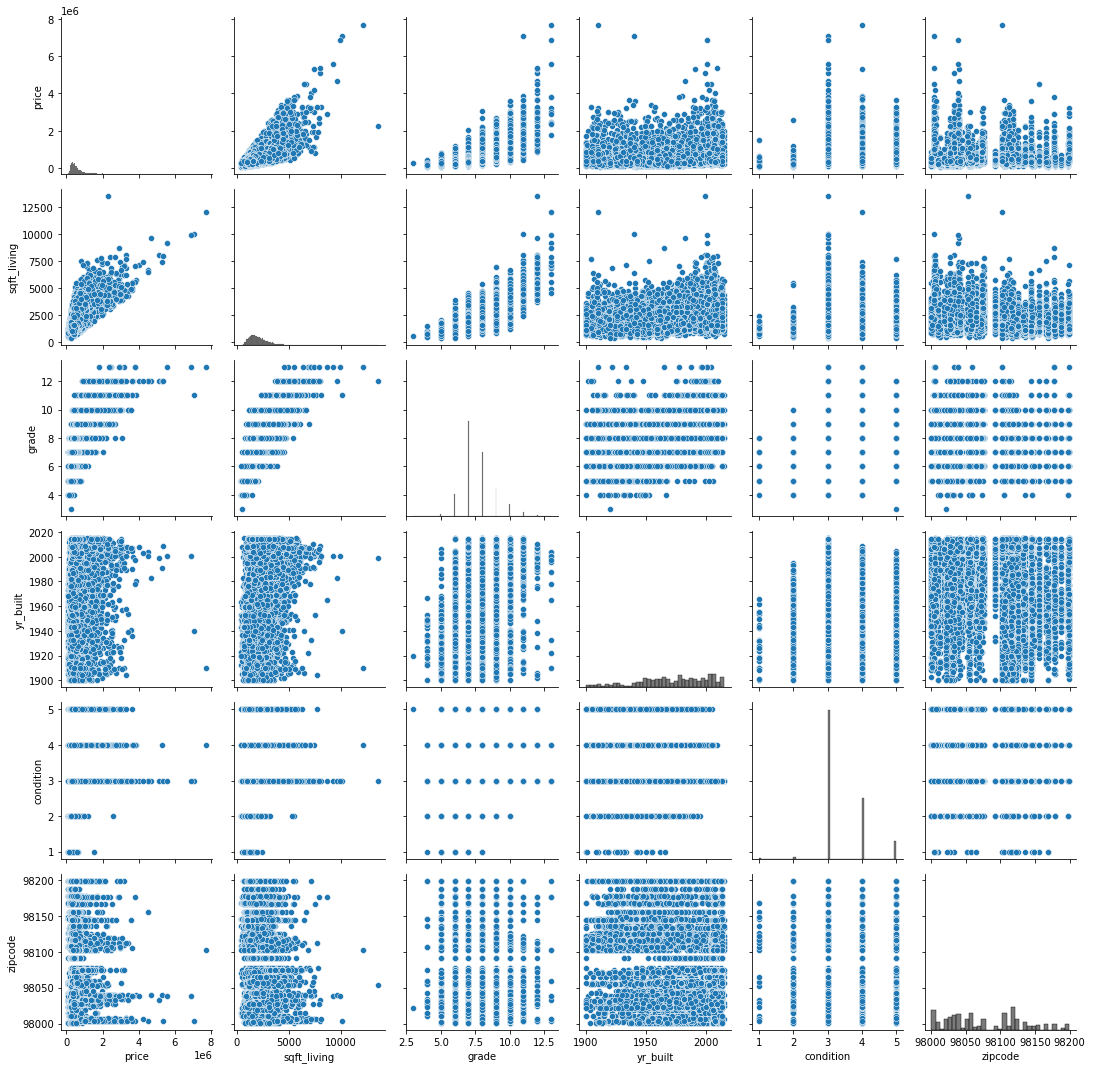

In [54]:
variables = ['price', 'sqft_living', 'grade', 'yr_built', 'condition', 'zipcode']
g = sns.PairGrid(zipcode_df, vars=variables)
g.map_diag(sns.histplot, hue=None, color=".3")
g.map_offdiag(sns.scatterplot)
g.add_legend()
#code from seaborn documentation

In [55]:
zipcode_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21143 entries, 0 to 21596
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21143 non-null  int64  
 1   date           21143 non-null  object 
 2   price          21143 non-null  float64
 3   bedrooms       21143 non-null  int64  
 4   bathrooms      21143 non-null  float64
 5   sqft_living    21143 non-null  int64  
 6   sqft_lot       21143 non-null  int64  
 7   floors         21143 non-null  float64
 8   waterfront     21143 non-null  object 
 9   view           21143 non-null  object 
 10  condition      21143 non-null  int64  
 11  grade          21143 non-null  int64  
 12  sqft_above     21143 non-null  int64  
 13  sqft_basement  21143 non-null  float64
 14  yr_built       21143 non-null  int64  
 15  yr_renovated   17389 non-null  float64
 16  zipcode        21143 non-null  object 
dtypes: float64(5), int64(8), object(4)
memory usage: 2

In [56]:
zipcode_df['date'].max()

Timestamp('2015-05-27 00:00:00')

In [57]:
new_df = zipcode_df.copy()
new_df.set_index('id', inplace=True)
new_df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode
id,,,,,,,,,,,,,,,,
7129300520,2014-10-13 00:00:00,221900.0,3,1.00,1180,5650,1.0,NO,NONE,3,7,1180,0.0,1955,0.0,98178
6414100192,2014-12-09 00:00:00,538000.0,3,2.25,2570,7242,2.0,NO,NONE,3,7,2170,400.0,1951,1991.0,98125
5631500400,2015-02-25 00:00:00,180000.0,2,1.00,770,10000,1.0,NO,NONE,3,6,770,0.0,1933,NaN,98028
2487200875,2014-12-09 00:00:00,604000.0,4,3.00,1960,5000,1.0,NO,NONE,5,7,1050,910.0,1965,0.0,98136
1954400510,2015-02-18 00:00:00,510000.0,3,2.00,1680,8080,1.0,NO,NONE,3,8,1680,0.0,1987,0.0,98074


In [58]:
waterfront_ohe = new_df[['waterfront']]
encoder_waterfront = OrdinalEncoder()
encoder_waterfront.fit(waterfront_ohe)
encoder_waterfront.categories_[0]
waterfront_encoded_train = encoder_waterfront.transform(waterfront_ohe)
waterfront_encoded_train = waterfront_encoded_train.flatten()
waterfront_encoded_train
new_df['waterfront'] = waterfront_encoded_train
new_df

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode
id,,,,,,,,,,,,,,,,
7129300520,2014-10-13 00:00:00,221900.0,3,1.00,1180,5650,1.0,0.0,NONE,3,7,1180,0.0,1955,0.0,98178
6414100192,2014-12-09 00:00:00,538000.0,3,2.25,2570,7242,2.0,0.0,NONE,3,7,2170,400.0,1951,1991.0,98125
5631500400,2015-02-25 00:00:00,180000.0,2,1.00,770,10000,1.0,0.0,NONE,3,6,770,0.0,1933,NaN,98028
2487200875,2014-12-09 00:00:00,604000.0,4,3.00,1960,5000,1.0,0.0,NONE,5,7,1050,910.0,1965,0.0,98136
1954400510,2015-02-18 00:00:00,510000.0,3,2.00,1680,8080,1.0,0.0,NONE,3,8,1680,0.0,1987,0.0,98074
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263000018,2014-05-21 00:00:00,360000.0,3,2.50,1530,1131,3.0,0.0,NONE,3,8,1530,0.0,2009,0.0,98103
6600060120,2015-02-23 00:00:00,400000.0,4,2.50,2310,5813,2.0,0.0,NONE,3,8,2310,0.0,2014,0.0,98146
1523300141,2014-06-23 00:00:00,402101.0,2,0.75,1020,1350,2.0,0.0,NONE,3,7,1020,0.0,2009,0.0,98144


In [59]:
new_df['view'].replace(to_replace="AVERAGE", value="View Average", inplace=True)
new_df['view'].replace(to_replace="NONE", value="View None", inplace=True)
new_df['view'].replace(to_replace="FAIR", value="View Fair", inplace=True)
new_df['view'].replace(to_replace="GOOD", value="View Good", inplace=True)
new_df['view'].replace(to_replace="EXCELLENT", value="View Excellent", inplace=True)

In [60]:
view_ohe = new_df[['view']]
ohe = OneHotEncoder(categories='auto', sparse=False, handle_unknown="ignore")
ohe.fit(view_ohe)
ohe.categories_
view_encoded_train = ohe.transform(view_ohe)
view_encoded_train = pd.DataFrame(view_encoded_train, columns=ohe.categories_[0], index=new_df.index)
view_encoded_train
new_df.drop('view', axis=1, inplace=True)
new_df = pd.concat([new_df, view_encoded_train], axis=1)
new_df

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,View Average,View Excellent,View Fair,View Good,View None
id,,,,,,,,,,,,,,,,,,,,
7129300520,2014-10-13 00:00:00,221900.0,3,1.00,1180,5650,1.0,0.0,3,7,1180,0.0,1955,0.0,98178,0.0,0.0,0.0,0.0,1.0
6414100192,2014-12-09 00:00:00,538000.0,3,2.25,2570,7242,2.0,0.0,3,7,2170,400.0,1951,1991.0,98125,0.0,0.0,0.0,0.0,1.0
5631500400,2015-02-25 00:00:00,180000.0,2,1.00,770,10000,1.0,0.0,3,6,770,0.0,1933,NaN,98028,0.0,0.0,0.0,0.0,1.0
2487200875,2014-12-09 00:00:00,604000.0,4,3.00,1960,5000,1.0,0.0,5,7,1050,910.0,1965,0.0,98136,0.0,0.0,0.0,0.0,1.0
1954400510,2015-02-18 00:00:00,510000.0,3,2.00,1680,8080,1.0,0.0,3,8,1680,0.0,1987,0.0,98074,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263000018,2014-05-21 00:00:00,360000.0,3,2.50,1530,1131,3.0,0.0,3,8,1530,0.0,2009,0.0,98103,0.0,0.0,0.0,0.0,1.0
6600060120,2015-02-23 00:00:00,400000.0,4,2.50,2310,5813,2.0,0.0,3,8,2310,0.0,2014,0.0,98146,0.0,0.0,0.0,0.0,1.0
1523300141,2014-06-23 00:00:00,402101.0,2,0.75,1020,1350,2.0,0.0,3,7,1020,0.0,2009,0.0,98144,0.0,0.0,0.0,0.0,1.0


In [61]:
grade = new_df[['grade']]
grade_ohe = OneHotEncoder(categories='auto', sparse=False, handle_unknown="ignore")
grade_ohe.fit(grade)
grade_ohe.categories_
grade_encoded = grade_ohe.transform(grade)
grade_encoded = pd.DataFrame(grade_encoded, columns=grade_ohe.categories_[0], index=new_df.index)
grade_encoded
new_df.drop('grade', axis=1, inplace=True)
new_df = pd.concat([new_df, grade_encoded], axis=1)
new_df

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,sqft_above,...,4,5,6,7,8,9,10,11,12,13
id,,,,,,,,,,,,,,,,,,,,,
7129300520,2014-10-13 00:00:00,221900.0,3,1.00,1180,5650,1.0,0.0,3,1180,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
6414100192,2014-12-09 00:00:00,538000.0,3,2.25,2570,7242,2.0,0.0,3,2170,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5631500400,2015-02-25 00:00:00,180000.0,2,1.00,770,10000,1.0,0.0,3,770,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2487200875,2014-12-09 00:00:00,604000.0,4,3.00,1960,5000,1.0,0.0,5,1050,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1954400510,2015-02-18 00:00:00,510000.0,3,2.00,1680,8080,1.0,0.0,3,1680,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263000018,2014-05-21 00:00:00,360000.0,3,2.50,1530,1131,3.0,0.0,3,1530,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
6600060120,2015-02-23 00:00:00,400000.0,4,2.50,2310,5813,2.0,0.0,3,2310,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1523300141,2014-06-23 00:00:00,402101.0,2,0.75,1020,1350,2.0,0.0,3,1020,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [62]:
zipcode_train = new_df[['zipcode']]
zipcode_ohe = OneHotEncoder(categories='auto', sparse=False, handle_unknown="ignore")
zipcode_ohe.fit(zipcode_train)
zipcode_ohe.categories_
zipcode_encoded_train = zipcode_ohe.transform(zipcode_train)
zipcode_encoded_train = pd.DataFrame(zipcode_encoded_train, columns=zipcode_ohe.categories_[0], index=new_df.index)
new_df.drop('zipcode', axis=1, inplace=True)
new_df = pd.concat([new_df, zipcode_encoded_train], axis=1)
new_df

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,sqft_above,...,98146,98148,98155,98166,98168,98177,98178,98188,98198,98199
id,,,,,,,,,,,,,,,,,,,,,
7129300520,2014-10-13 00:00:00,221900.0,3,1.00,1180,5650,1.0,0.0,3,1180,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
6414100192,2014-12-09 00:00:00,538000.0,3,2.25,2570,7242,2.0,0.0,3,2170,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5631500400,2015-02-25 00:00:00,180000.0,2,1.00,770,10000,1.0,0.0,3,770,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2487200875,2014-12-09 00:00:00,604000.0,4,3.00,1960,5000,1.0,0.0,5,1050,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1954400510,2015-02-18 00:00:00,510000.0,3,2.00,1680,8080,1.0,0.0,3,1680,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263000018,2014-05-21 00:00:00,360000.0,3,2.50,1530,1131,3.0,0.0,3,1530,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6600060120,2015-02-23 00:00:00,400000.0,4,2.50,2310,5813,2.0,0.0,3,2310,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1523300141,2014-06-23 00:00:00,402101.0,2,0.75,1020,1350,2.0,0.0,3,1020,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [63]:
new_df['condition'].replace(to_replace=1, value="Condition Poor", inplace=True)
new_df['condition'].replace(to_replace=2, value="Condition Fair", inplace=True)
new_df['condition'].replace(to_replace=3, value="Condition Average", inplace=True)
new_df['condition'].replace(to_replace=4, value="Condition Good", inplace=True)
new_df['condition'].replace(to_replace=5, value="Condition Very Good", inplace=True)

In [64]:
condition_train = new_df[['condition']]
condition_ohe = OneHotEncoder(categories='auto', sparse=False, handle_unknown="ignore")
condition_ohe.fit(condition_train)
condition_ohe.categories_
condition_encoded_train = condition_ohe.transform(condition_train)
condition_encoded_train = pd.DataFrame(condition_encoded_train, columns=condition_ohe.categories_[0], index=new_df.index)
condition_encoded_train
new_df.drop('condition', axis=1, inplace=True)
new_df = pd.concat([new_df, condition_encoded_train], axis=1)
new_df

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,sqft_above,sqft_basement,...,98177,98178,98188,98198,98199,Condition Average,Condition Fair,Condition Good,Condition Poor,Condition Very Good
id,,,,,,,,,,,,,,,,,,,,,
7129300520,2014-10-13 00:00:00,221900.0,3,1.00,1180,5650,1.0,0.0,1180,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
6414100192,2014-12-09 00:00:00,538000.0,3,2.25,2570,7242,2.0,0.0,2170,400.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
5631500400,2015-02-25 00:00:00,180000.0,2,1.00,770,10000,1.0,0.0,770,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2487200875,2014-12-09 00:00:00,604000.0,4,3.00,1960,5000,1.0,0.0,1050,910.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1954400510,2015-02-18 00:00:00,510000.0,3,2.00,1680,8080,1.0,0.0,1680,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263000018,2014-05-21 00:00:00,360000.0,3,2.50,1530,1131,3.0,0.0,1530,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
6600060120,2015-02-23 00:00:00,400000.0,4,2.50,2310,5813,2.0,0.0,2310,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1523300141,2014-06-23 00:00:00,402101.0,2,0.75,1020,1350,2.0,0.0,1020,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [65]:
new_df.drop(columns='date', inplace=True)
new_df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,sqft_above,sqft_basement,yr_built,...,98177,98178,98188,98198,98199,Condition Average,Condition Fair,Condition Good,Condition Poor,Condition Very Good
id,,,,,,,,,,,,,,,,,,,,,
7129300520,221900.0,3,1.00,1180,5650,1.0,0.0,1180,0.0,1955,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
6414100192,538000.0,3,2.25,2570,7242,2.0,0.0,2170,400.0,1951,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
5631500400,180000.0,2,1.00,770,10000,1.0,0.0,770,0.0,1933,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2487200875,604000.0,4,3.00,1960,5000,1.0,0.0,1050,910.0,1965,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1954400510,510000.0,3,2.00,1680,8080,1.0,0.0,1680,0.0,1987,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263000018,360000.0,3,2.50,1530,1131,3.0,0.0,1530,0.0,2009,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
6600060120,400000.0,4,2.50,2310,5813,2.0,0.0,2310,0.0,2014,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1523300141,402101.0,2,0.75,1020,1350,2.0,0.0,1020,0.0,2009,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [66]:
np.random.seed(46)
new_df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,sqft_above,sqft_basement,yr_built,...,98177,98178,98188,98198,98199,Condition Average,Condition Fair,Condition Good,Condition Poor,Condition Very Good
id,,,,,,,,,,,,,,,,,,,,,
7129300520,221900.0,3,1.00,1180,5650,1.0,0.0,1180,0.0,1955,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
6414100192,538000.0,3,2.25,2570,7242,2.0,0.0,2170,400.0,1951,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
5631500400,180000.0,2,1.00,770,10000,1.0,0.0,770,0.0,1933,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2487200875,604000.0,4,3.00,1960,5000,1.0,0.0,1050,910.0,1965,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1954400510,510000.0,3,2.00,1680,8080,1.0,0.0,1680,0.0,1987,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263000018,360000.0,3,2.50,1530,1131,3.0,0.0,1530,0.0,2009,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
6600060120,400000.0,4,2.50,2310,5813,2.0,0.0,2310,0.0,2014,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1523300141,402101.0,2,0.75,1020,1350,2.0,0.0,1020,0.0,2009,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [67]:
my_sample = new_df.sample(1)
my_sample_price = my_sample.iloc[0,0]
my_sample_pt = my_sample.drop('price', axis=1)

print(f'Price of Sample: ${my_sample_price}')
my_sample_pt

Price of Sample: $420000.0


,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,sqft_above,sqft_basement,yr_built,yr_renovated,...,98177,98178,98188,98198,98199,Condition Average,Condition Fair,Condition Good,Condition Poor,Condition Very Good
id,,,,,,,,,,,,,,,,,,,,,
9536601331,4,2.0,2280,10319,1.0,0.0,1270,1010.0,1989,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [68]:
y = new_df['price']
X = new_df.drop('price', axis=1)

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [70]:
columns = ['sqft_living', 'bedrooms', 'bathrooms', 'sqft_lot', 'waterfront', "View Average", "View None", "View Fair", "View Good","View Excellent", "Condition Poor","Condition Fair", "Condition Average", "Condition Good", "Condition Very Good", 3,4,5,6,7,8,9,10,11,12,13, 'yr_built']

X_train = X_train.loc[:, columns]

X_train


,sqft_living,bedrooms,bathrooms,sqft_lot,waterfront,View Average,View None,View Fair,View Good,View Excellent,...,5,6,7,8,9,10,11,12,13,yr_built
id,,,,,,,,,,,,,,,,,,,,,
293610040,2950,4,2.75,5803,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2007
6837700175,3520,3,1.75,12350,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1960
1226059161,2560,4,2.75,83200,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1980
217500005,2020,3,2.50,7800,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1958
6844700975,1290,2,1.00,6528,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1941
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1829300260,3360,4,2.50,13636,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1987
1251200045,3840,5,3.25,4800,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2008
2264500425,1760,2,1.75,4400,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1930


In [71]:
columns = ['sqft_living', 'bedrooms', 'bathrooms', 'sqft_lot', 'waterfront', "View Average", "View None", "View Fair", "View Good","View Excellent", "Condition Poor","Condition Fair", "Condition Average", "Condition Good", "Condition Very Good", 3,4,5,6,7,8,9,10,11,12,13, 'yr_built']

X_test = X_test.loc[:, columns]

X_test

,sqft_living,bedrooms,bathrooms,sqft_lot,waterfront,View Average,View None,View Fair,View Good,View Excellent,...,5,6,7,8,9,10,11,12,13,yr_built
id,,,,,,,,,,,,,,,,,,,,,
4078300040,3070,3,3.50,7050,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1928
8651441290,1430,3,1.50,5200,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1977
9406570300,2980,4,2.50,8786,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2003
818500100,1240,2,2.50,2689,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1986
8945300110,1000,3,1.00,8470,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1963
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3426049284,4110,4,3.25,15929,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2001
8718500495,2190,4,1.75,9225,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1959
1771100330,1510,3,2.50,10384,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1976


In [72]:
#using SKLearn Preprocessing Cumulative Lab as a guide - reworked and performed preprocessing prior to split.
print(f"X_train is a DataFrame with {X_train.shape[0]} rows and {X_train.shape[1]} columns")
print(f"y_train is a Series with {y_train.shape[0]} values")

print(X_train.shape[0] == y_train.shape[0])

X_train is a DataFrame with 15857 rows and 27 columns
y_train is a Series with 15857 values
True


In [73]:
base_model = LinearRegression()
base_model.fit(X_train, y_train)
print(base_model.score(X_train, y_train))
print(base_model.score(X_test, y_test))

0.6813155891337863
0.6751498819078567


In [74]:
import statsmodels.api as sm

In [75]:
price = y_train
preds = X_train
test_lm1 = sm.OLS(price,X_train)
results = test_lm1.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.681
Model:                            OLS   Adj. R-squared:                  0.681
Method:                 Least Squares   F-statistic:                     1410.
Date:                Thu, 06 Jan 2022   Prob (F-statistic):               0.00
Time:                        09:52:53   Log-Likelihood:            -2.1657e+05
No. Observations:               15857   AIC:                         4.332e+05
Df Residuals:                   15832   BIC:                         4.334e+05
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
sqft_living           133.7903      3.843     34.819      0.000     126.259     141.322
bedrooms            -2.841e+04   2420.141    -11.739      0.000   -3.32e+04   -2.37e+04
bathrooms            6.116e+04   3762.187     16.257      0.000    5.38e+04    6.85e+04
sqft_lot               -0.2681      0.040     -6.741      0.000      -0.346      -0.190
waterfront           4.861e+05   2.47e+04     19.657      0.000    4.38e+05    5.35e+05
View Average         2.722e+06   6.03e+04     45.139      0.000     2.6e+06    2.84e+06
View None            2.681e+06   6.08e+04     44.090      0.000    2.56e+06     2.8e+06
View Fair            2.801e+06   6.09e+04     46.007      0.000    2.68e+06    2.92e+06
View Good            2.791e+06   6.04e+04     46.194      0.000    2.67e+06    2.91e+06
View Excellent       2.936e+06   6.13e+04     47.903      0.000    2.82e+06    3.06e+06
Condition Poor       2.732e+06   7.16e+04     38.175      0.000    2.59e+06    2.87e+06
Condition Fair       2.755e+06   6.22e+04     44.282      0.000    2.63e+06    2.88e+06
Condition Average    2.792e+06   6.12e+04     45.600      0.000    2.67e+06    2.91e+06
Condition Good       2.805e+06   6.03e+04     46.522      0.000    2.69e+06    2.92e+06
Condition Very Good  2.846e+06   5.95e+04     47.814      0.000    2.73e+06    2.96e+06
3                     7.12e+05   1.93e+05      3.681      0.000    3.33e+05    1.09e+06
4                    7.538e+05   5.04e+04     14.970      0.000    6.55e+05    8.52e+05
5                    7.388e+05   3.38e+04     21.862      0.000    6.73e+05    8.05e+05
6                    7.896e+05   3.14e+04     25.146      0.000    7.28e+05    8.51e+05
7                    8.713e+05   3.19e+04     27.341      0.000    8.09e+05    9.34e+05
8                    9.654e+05   3.25e+04     29.688      0.000    9.02e+05    1.03e+06
9                    1.113e+06   3.31e+04     33.593      0.000    1.05e+06    1.18e+06
10                   1.297e+06   3.36e+04     38.603      0.000    1.23e+06    1.36e+06
11                   1.555e+06   3.51e+04     44.299      0.000    1.49e+06    1.62e+06
12                   2.036e+06   4.12e+04     49.410      0.000    1.96e+06    2.12e+06
13                   3.098e+06   7.27e+04     42.622      0.000    2.96e+06    3.24e+06
yr_built            -3156.5780     75.083    -42.041      0.000   -3303.749   -3009.407
==============================================================================
Omnibus:                     7981.594   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           188756.283
Skew:                           1.906   Prob(JB):                         0.00
Kurtosis:                      19.467   Cond. No.                     1.08e+16
================================================

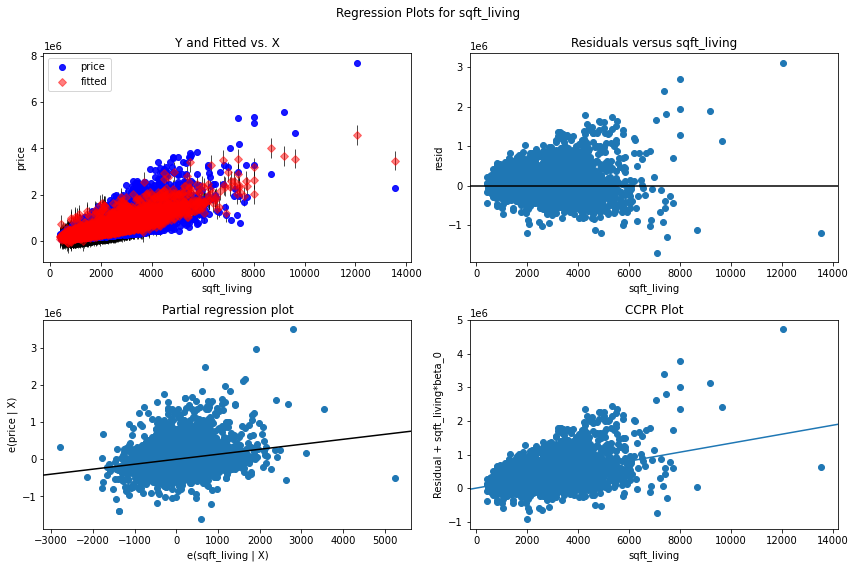

In [76]:
sm.graphics.plot_regress_exog(results, 'sqft_living', fig=plt.figure(figsize=(12, 8)));

In [77]:
sm.graphics.plot_regress_exog(results2, 'sqft_living', fig=plt.figure(figsize=(12, 8)));

NameError: name 'results2' is not defined

In [ ]:
columns = ['sqft_living', 'bedrooms', 'bathrooms', 'sqft_lot', 'waterfront', "View Average", "View None", "View Fair", "View Good","View Excellent", "Condition Poor","Condition Fair", "Condition Average", "Condition Good", "Condition Very Good", 3,4,5,6,7,8,9,10,11,12,13, 'yr_built']
X_col = X.loc[:, columns]

init_test= sm.OLS(y,X_col)
results_test = init_test.fit()
results_test.summary()

In [ ]:
columns = ['sqft_living', 'bedrooms', 'bathrooms', 'sqft_lot', 'waterfront', "View Average", "View None", "View Fair", "View Good","View Excellent", "Condition Poor","Condition Fair", "Condition Average", "Condition Good", "Condition Very Good", 3,4,5,6,7,8,9,10,11,12,13, 'yr_built']

scaled_x = X.loc[:, columns]
X_scaled = (scaled_x - np.mean(scaled_x)) / np.std(scaled_x)
X_scaled.describe()

In [ ]:
preds_scaled = X_scaled

test_scale = sm.OLS(y,preds_scaled)
results_scaled_test = test_scale.fit()
results_scaled_test.summary()

In [ ]:
X1 = new_df[["sqft_living"]]
X1 = sm.add_constant(X1)

model1 = sm.OLS(y, X1)
results1 = model1.fit()
results1.summary()


In [ ]:
X2 = new_df[[
    "sqft_living",
    "yr_built"
]]
X2 = sm.add_constant(X2)

model2 = sm.OLS(y, X2)
results2 = model2.fit()
results2.summary()

In [ ]:
X3 = new_df[[
    "sqft_living",
    "yr_built",
    "Condition Average"
]]
X3 = sm.add_constant(X3)

model3 = sm.OLS(y, X3)
results3 = model3.fit()
results3.summary()

In [ ]:
X4 = new_df[[
    "sqft_living",
    "yr_built",
    "Condition Average",
    "Condition Good"
]]
X4 = sm.add_constant(X4)

model4 = sm.OLS(y, X4)
results4 = model4.fit()
results4.summary()

In [ ]:
X5 = new_df[[
    "sqft_living",
    "yr_built",
    "Condition Fair",
    "Condition Average",
    "Condition Very Good"
]]
X5 = sm.add_constant(X5)

model5 = sm.OLS(y, X5)
results5 = model5.fit()
results5.summary()

In [ ]:
X6 = new_df[[
    "sqft_living",
    "yr_built",
    "Condition Poor",
    "Condition Fair",
    "Condition Average",
    "Condition Good",
    "Condition Very Good"
]]
X6 = sm.add_constant(X6)

model6 = sm.OLS(y, X6)
results6 = model6.fit()
results6.summary()

In [ ]:
X7 = new_df[[
    "sqft_living",
    "yr_built",
    "Condition Fair",
    "Condition Average",
    "Condition Good"
]]
X7 = sm.add_constant(X7)

model7 = sm.OLS(y, X7)
results7 = model7.fit()
results7.summary()

In [ ]:
X8 = new_df[[
    "sqft_living",
    "yr_built",
    "Condition Fair",
    "Condition Average",
    "Condition Good",
    "Condition Very Good",
    "waterfront"
]]
X8 = sm.add_constant(X8)

model8 = sm.OLS(y, X8)
results8 = model8.fit()
results8.summary()

In [ ]:
X9 = new_df[[
    "sqft_living",
    "Condition Fair",
    "Condition Average",
    "Condition Good",
    "Condition Very Good",
    "waterfront",
    6,7,8,9,10,11,12,13
]]
X9 = sm.add_constant(X9)

model9 = sm.OLS(y, X9)
results9 = model9.fit()
results9.summary()

In [ ]:
X10 = new_df[[
    "Condition Fair",
    "Condition Average",
    "Condition Good",
    "Condition Very Good",
    "waterfront",
    6,7,8,9,10,11,12,13
]]
X10 = sm.add_constant(X10)

model10 = sm.OLS(y, X10)
results10 = model10.fit()
results10.summary()

In [ ]:
X11 = new_df[[
    "Condition Fair",
    "Condition Average",
    "Condition Good",
    "Condition Very Good",
    6,7,8,9,10,11,12,13
]]
X11 = sm.add_constant(X11)

model11 = sm.OLS(y, X11)
results11 = model11.fit()
results11.summary()